In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [12]:
product = "NCRivendell"
lot = {
    'A25100020': {'1F': "Spec In", '1B': "Spec In"},
    'A25100021': {'1F': "Spec In", '1B': "Spec In"},
    'A25100011': {'1F': "Spec In", '1B': "Spec In"},
    'A25100060': {'1F': "Spec In", '1B': "Spec Out"},
    'A25100070': {'1F': "Spec Out", '1B': "Spec In"}
}

In [15]:
# Prepare the DataFrame
df = pd.DataFrame.from_dict(lot, orient='index')
df.index.name = "Lot ID"
df = df.reset_index()

# Normalize Result text (e.g., fixing case sensitivity)
df = df.replace({"Spec out": "Spec Out"})

# Melt DataFrame for plotting
melted_df = df.melt(id_vars=["Lot ID"], var_name="Layer", value_name="Result")

# Define colors
colors = {"Spec In": "green", "Spec Out": "red"}

C:\Users\TracyWang\AppData\Local\Temp\ipykernel_15324\1533147509.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  color_matrix = color_matrix.astype(object).replace({"green": 1, "red": -1})


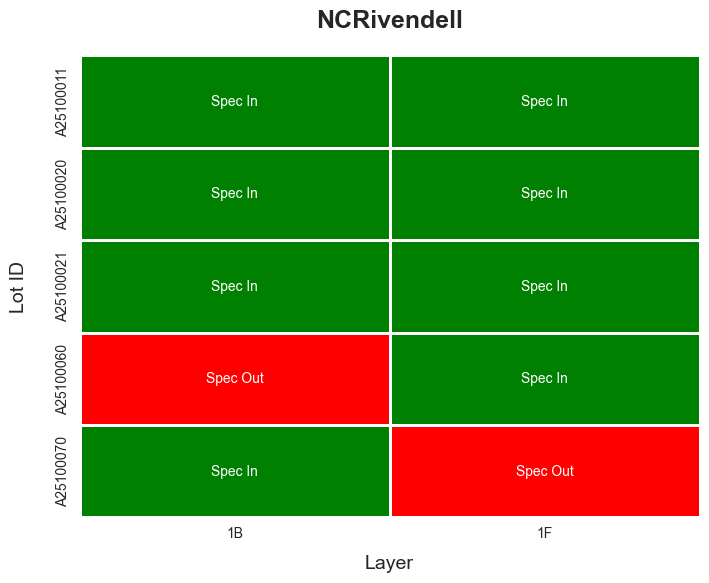

In [14]:
# Create Heatmap Data
heatmap_data = melted_df.pivot(index="Lot ID", columns="Layer", values="Result")

# Create a color matrix for the heatmap
color_matrix = heatmap_data.replace(colors)

# Explicitly convert to object type before replacing
color_matrix = color_matrix.astype(object).replace({"green": 1, "red": -1})

# Plot Heatmap
plt.figure(figsize=(8, 6))  # Larger figure
sns.heatmap(
    color_matrix,  # Numeric values for color mapping
    annot=heatmap_data,  # Show "Spec In"/"Spec Out" in cells
    fmt='',  # No formatting
    cmap=sns.color_palette(["red", "white", "green"]),  # Color mapping
    cbar=False,  # No color bar
    linewidths=1  # Cell borders
)

# Adjust axis labels
plt.xlabel("Layer", fontsize=14, labelpad=10)  # Bigger font and more padding
plt.ylabel("Lot ID", fontsize=14, labelpad=20)  # Bigger font and more padding

# Title adjustments
plt.title(f"{product}", fontsize=18, fontweight="bold", pad=20)  # Larger, bold title

# Display the heatmap
plt.show()